In [ ]:
pip install prophet


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpebbecw_q/dr4vjbzy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpebbecw_q/rg7cofj2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2233', 'data', 'file=/tmp/tmpebbecw_q/dr4vjbzy.json', 'init=/tmp/tmpebbecw_q/rg7cofj2.json', 'output', 'file=/tmp/tmpebbecw_q/prophet_model8sqbk559/prophet_model-20240505145326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


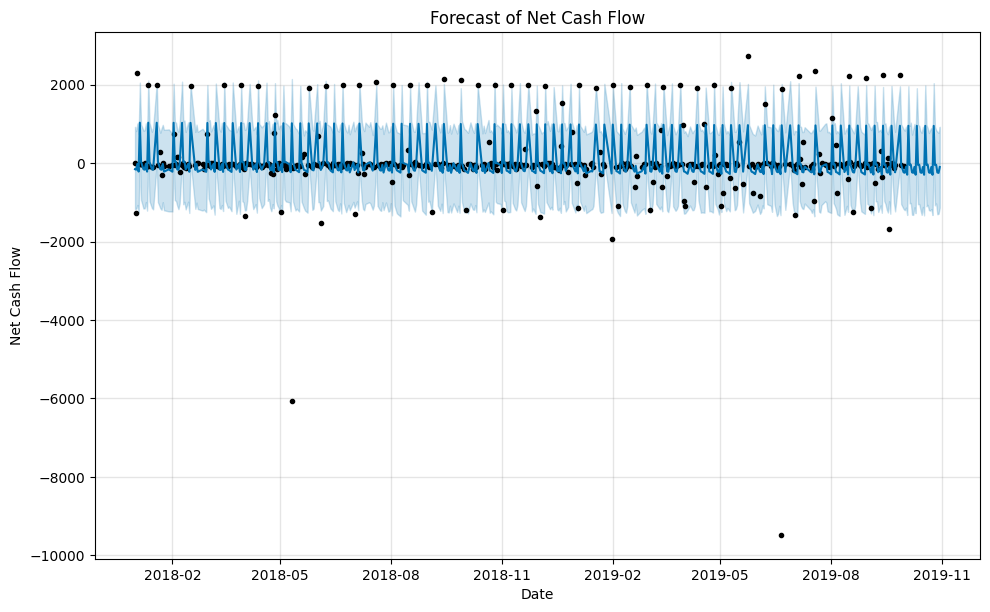

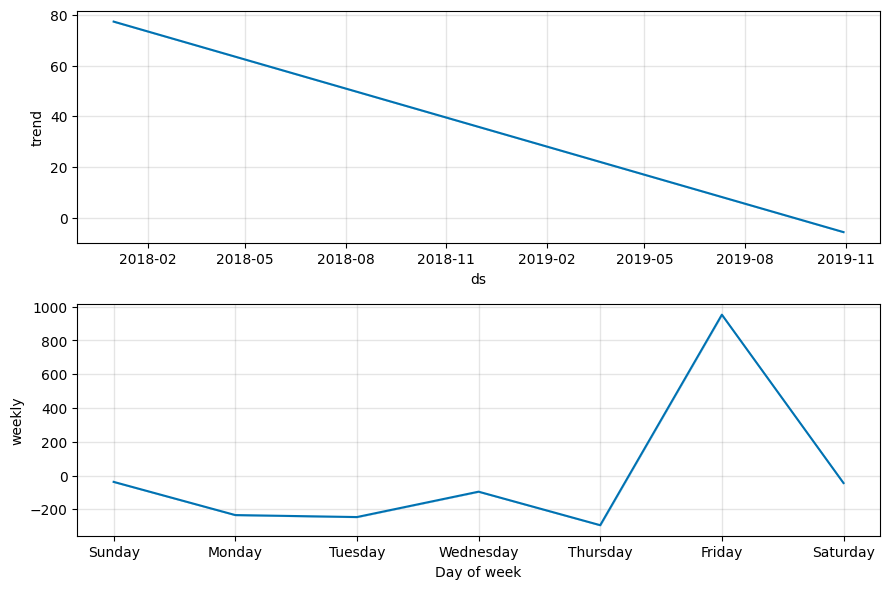

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('personal_transactions.csv')

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate data by date and calculate net cash flow (income minus expenses)
data_grouped = data.groupby('Date').agg(
    income=('Amount', lambda x: sum(x[data['Transaction Type'] == 'credit'])),
    expenses=('Amount', lambda x: sum(x[data['Transaction Type'] == 'debit']))
).reset_index()

# Calculate net cash flow (income minus expenses)
data_grouped['net_cash_flow'] = data_grouped['income'] - data_grouped['expenses']

# Prepare data for Prophet
prophet_data = data_grouped[['Date', 'net_cash_flow']]
prophet_data.columns = ['ds', 'y']

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_data)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Forecast of Net Cash Flow')
plt.xlabel('Date')
plt.ylabel('Net Cash Flow')
plt.show()

# Plot the forecast components (trend, weekly, yearly)
model.plot_components(forecast)
plt.show()


   Day of the Week  Net Cash Flow Variation
0                0               -37.652967
1                1              -234.200669
2                2              -245.956847
3                3               -95.723445
4                4              -294.196131
5                5               952.360176
6                6               -44.630115


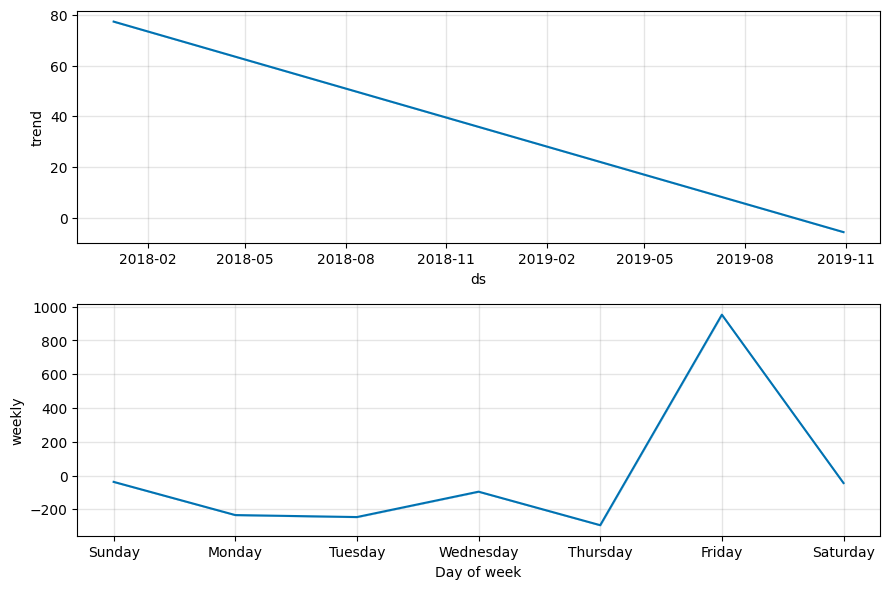

In [10]:
# Get the weekly seasonality data
seasonal_data = model.plot_components(forecast)

# The second subplot is the weekly plot
weekly_plot = seasonal_data.get_axes()[1]

# Get the lines (lineplot) from the weekly plot
lines = weekly_plot.get_lines()

#Extracting the data
x_weekly = lines[0].get_xdata()  # x-axis data (days of the week)
y_weekly = lines[0].get_ydata()  # y-axis data (net cash flow variation)

# DataFrame with the weekly data for easier interpretation and analysis
weekly_df = pd.DataFrame({
    'Day of the Week': x_weekly,
    'Net Cash Flow Variation': y_weekly
})

# Print the weekly data
print(weekly_df)
